## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix




## Loading Data and applying K-means clustering

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=iris.feature_names)



In [3]:
kmean = KMeans(n_clusters=4,random_state=42,n_init="auto") 
df['clusters'] = kmean.fit_predict(X)  # Add cluster labels to the DataFrame

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Plotting 2 features 

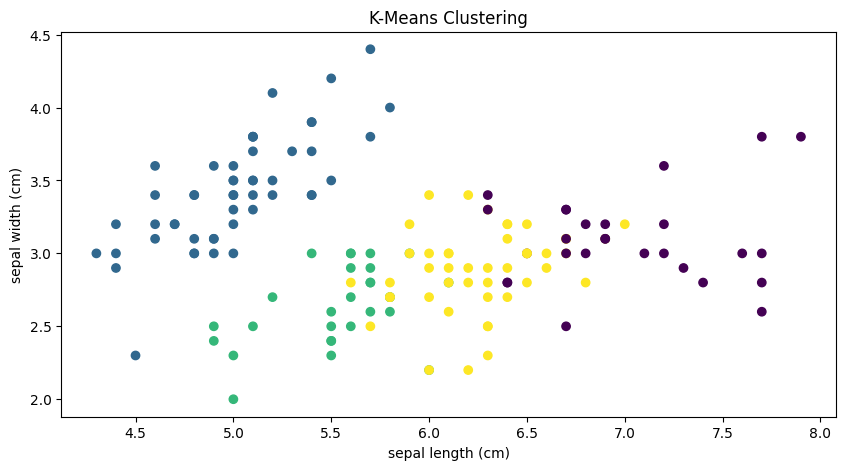

In [5]:
## Plot the clusters based on the first two features
plt.figure(figsize=(10,5))
plt.scatter(df[feature_names[0]],df[feature_names[1]],c=df['clusters'], cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering')
plt.show()

## Evaluation through comparing 

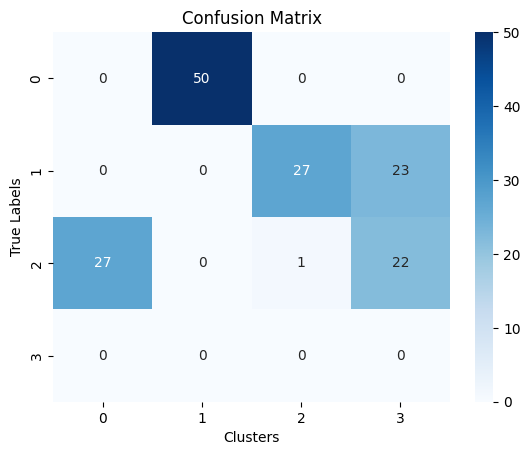

In [6]:
## Evaluate clustering by comparing to true labels
cm = confusion_matrix(Y,df['clusters'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clusters')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Choosing the Optimal Number of Clusters

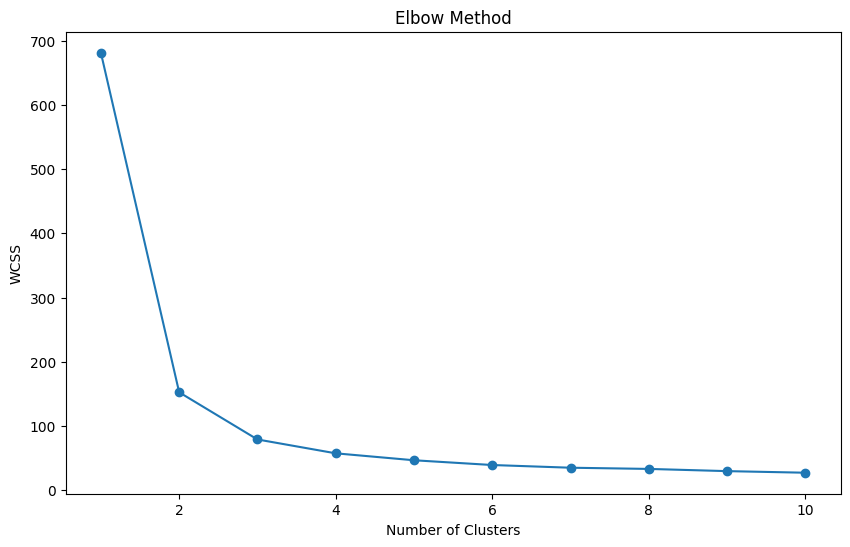

In [8]:
## Elbow Method
# Compute WCSS (Within-Cluster Sum of Squares) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init="auto")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  #Inertia is the WCSS

## Plotting elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


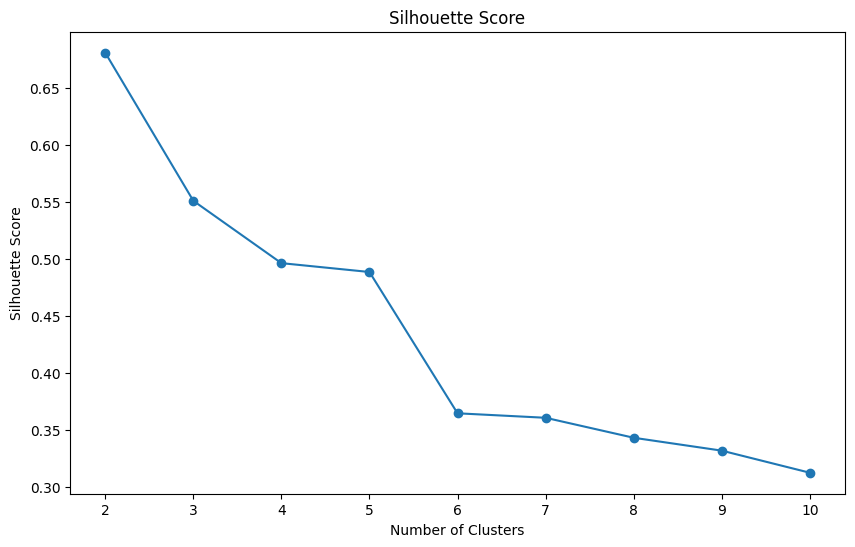

In [9]:
## Silhouette Score

from sklearn.metrics import silhouette_score

# Compute Silhouette Score for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init="auto")
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plotting the Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


##  Cluster Visualization with PCA

In [10]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the feature space to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


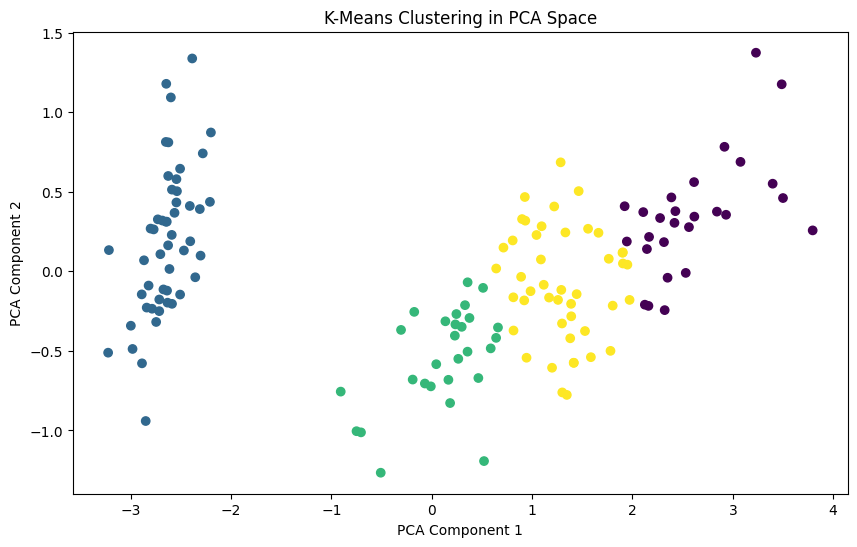

In [12]:
## Plot the clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['clusters'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering in PCA Space')
plt.show()


## Hierarchical Clustering: Dendrogram

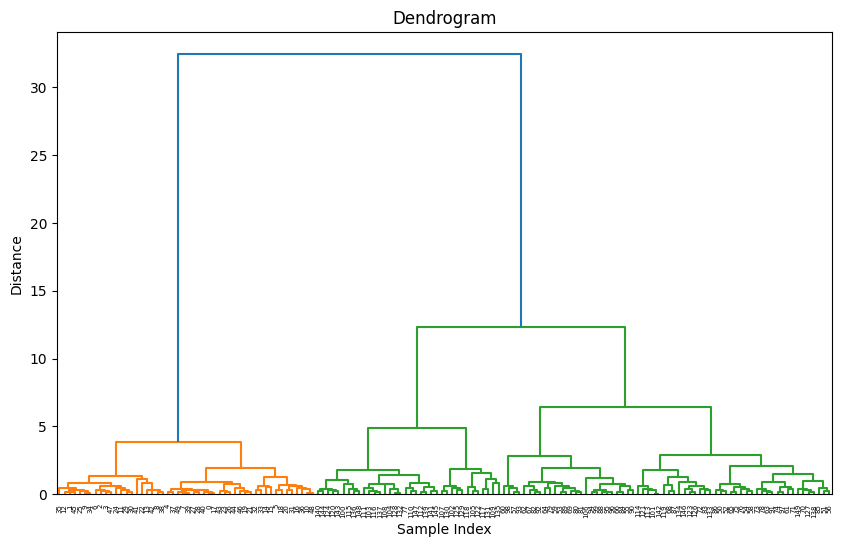

In [13]:
# Perform hierarchical clustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # Ward's method minimizes variance
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## Comparing Clustering Algorithms

In [14]:
# Apply Agglomerative Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)


## Compare Clustering Results

In [15]:
# Predict clusters using K-Means
kmeans_labels = kmeans.labels_


In [18]:
from sklearn.metrics import confusion_matrix, silhouette_score

# Evaluate and compare clustering results
cm_kmeans = confusion_matrix(Y, kmeans_labels)
cm_agg = confusion_matrix(Y, agg_labels)

# Compute Silhouette Scores
sil_score_kmeans = silhouette_score(X, kmeans_labels)
sil_score_agg = silhouette_score(X, agg_labels)

print("K-Means Silhouette Score:", sil_score_kmeans)
print("Agglomerative Silhouette Score:", sil_score_agg)


K-Means Silhouette Score: 0.3127258983320567
Agglomerative Silhouette Score: 0.5543236611296419


## Visualize Comparison

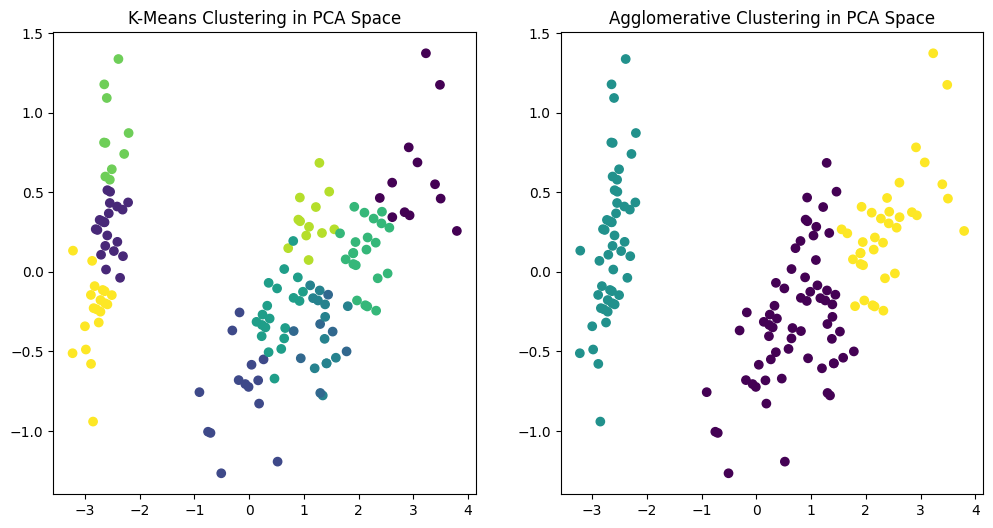

In [19]:
# Visualize comparison in PCA space
plt.figure(figsize=(12, 6))

# K-Means Clustering in PCA Space
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering in PCA Space')

# Agglomerative Clustering in PCA Space
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering in PCA Space')

plt.show()
